In [3]:
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt


In [8]:
articles = pd.read_csv('DXMeSH_20240521204242/Pubmed_results.csv')
articles.head()

,pmid,doi,title,abstract,year,month,day,jabbrv,journal,keywords,lastname,firstname,address,email
0,38564758,10.1080/15592294.2024.2337087,Upregulation of <i>GPR133</i> expression impai...,Decidual macrophages are the second-largest im...,2024,4,4,Epigenetics,Epigenetics,GPR133; Recurrent spontaneous miscarriage; dec...,Sun,Jia-Xue,"Department of Biobank, Shanghai Key Laboratory...",NaN
1,38467350,10.1111/jog.15907,Bibliometric analysis of the global trends in ...,A comprehensive analysis was conducted to expl...,2024,4,28,J Obstet Gynaecol Res,The journal of obstetrics and gynaecology rese...,bibliometric; immune; inflammation; recurrent ...,Li,Jing-Wei,"First School of Clinical Medicine, Guangzhou U...",NaN
2,38417123,10.1002/advs.202306359,JPT2 Affects Trophoblast Functions and Macroph...,Recurrent spontaneous abortion (RSA) is a preg...,2024,4,24,Adv Sci (Weinh),"Advanced science (Weinheim, Baden-Wurttemberg,...",jupiter microtubule&#x2010;associated homolog ...,Chen,Xin,"Reproductive Medical Center, Renmin Hospital o...",NaN
3,38414308,10.1111/aji.13818,Kisspeptin prevents pregnancy loss by modulati...,Immune factors are crucial in the development ...,2024,2,29,Am J Reprod Immunol,American journal of reproductive immunology (N...,GPR54; MDSCs; Treg; kisspeptin; macrophages; r...,Yang,Yanhong,"Department of Obstetrics and Gynecology, the S...",NaN
4,38362587,10.3389/fendo.2023.1290766,Investigating the molecular mechanism of tradi...,"Placental syndromes, which include pregnancy l...",2024,2,19,Front Endocrinol (Lausanne),Frontiers in endocrinology,Mendelian randomization; inflammatory cytokine...,Huang,Shan,"Medical Intensive Care Unit, Guangdong Women a...",NaN


In [27]:
articles['keyword_list'] = articles['keywords'].str.split(';')


In [28]:
articles.head()

,pmid,doi,title,abstract,year,month,day,jabbrv,journal,keywords,lastname,firstname,address,email,keyword_list
0,38564758,10.1080/15592294.2024.2337087,Upregulation of <i>GPR133</i> expression impai...,Decidual macrophages are the second-largest im...,2024,4,4,Epigenetics,Epigenetics,GPR133; Recurrent spontaneous miscarriage; dec...,Sun,Jia-Xue,"Department of Biobank, Shanghai Key Laboratory...",NaN,"[GPR133, Recurrent spontaneous miscarriage, ..."
1,38467350,10.1111/jog.15907,Bibliometric analysis of the global trends in ...,A comprehensive analysis was conducted to expl...,2024,4,28,J Obstet Gynaecol Res,The journal of obstetrics and gynaecology rese...,bibliometric; immune; inflammation; recurrent ...,Li,Jing-Wei,"First School of Clinical Medicine, Guangzhou U...",NaN,"[bibliometric, immune, inflammation, recurr..."
2,38417123,10.1002/advs.202306359,JPT2 Affects Trophoblast Functions and Macroph...,Recurrent spontaneous abortion (RSA) is a preg...,2024,4,24,Adv Sci (Weinh),"Advanced science (Weinheim, Baden-Wurttemberg,...",jupiter microtubule&#x2010;associated homolog ...,Chen,Xin,"Reproductive Medical Center, Renmin Hospital o...",NaN,"[jupiter microtubule&#x2010, associated homolo..."
3,38414308,10.1111/aji.13818,Kisspeptin prevents pregnancy loss by modulati...,Immune factors are crucial in the development ...,2024,2,29,Am J Reprod Immunol,American journal of reproductive immunology (N...,GPR54; MDSCs; Treg; kisspeptin; macrophages; r...,Yang,Yanhong,"Department of Obstetrics and Gynecology, the S...",NaN,"[GPR54, MDSCs, Treg, kisspeptin, macrophag..."
4,38362587,10.3389/fendo.2023.1290766,Investigating the molecular mechanism of tradi...,"Placental syndromes, which include pregnancy l...",2024,2,19,Front Endocrinol (Lausanne),Frontiers in endocrinology,Mendelian randomization; inflammatory cytokine...,Huang,Shan,"Medical Intensive Care Unit, Guangdong Women a...",NaN,"[Mendelian randomization, inflammatory cytoki..."


In [18]:
print(articles['keyword_list'].apply(lambda x: type(x)))


0      <class 'list'>
1      <class 'list'>
2      <class 'list'>
3      <class 'list'>
4      <class 'list'>
            ...      
493    <class 'list'>
494    <class 'list'>
495    <class 'list'>
496    <class 'list'>
497    <class 'list'>
Name: keyword_list, Length: 498, dtype: object


In [40]:
type(articles['keyword_list'][1][1])

str

In [43]:
[sublist for sublist in articles['keyword_list'] ]

[['GPR133',
  ' Recurrent spontaneous miscarriage',
  ' decidual macrophage',
  ' methylation',
  ' phagocytosis',
  ' Female',
  ' Humans',
  ' Pregnancy',
  ' Abortion, Spontaneous',
  ' Decidua',
  ' DNA Methylation',
  ' Macrophages',
  ' Phagocytosis',
  ' Up-Regulation'],
 ['bibliometric',
  ' immune',
  ' inflammation',
  ' recurrent spontaneous abortion',
  ' spontaneous abortions',
  ' Humans',
  ' Bibliometrics',
  ' Abortion, Habitual',
  ' Female',
  ' Pregnancy',
  ' Biomedical Research',
  ' Antiphospholipid Syndrome'],
 ['jupiter microtubule&#x2010',
  'associated homolog 2',
  ' macrophage metabolism',
  ' macrophage polarization',
  ' recurrent spontaneous abortion',
  ' trophoblast',
  ' Animals',
  ' Female',
  ' Humans',
  ' Mice',
  ' Pregnancy',
  ' Abortion, Habitual',
  ' Disease Models, Animal',
  ' Macrophages',
  ' Microtubule-Associated Proteins',
  ' Trophoblasts'],
 ['GPR54',
  ' MDSCs',
  ' Treg',
  ' kisspeptin',
  ' macrophages',
  ' recurrent spontaneo

In [44]:
[word for sublist in articles['keyword_list'] for word in sublist]

TypeError: 'float' object is not iterable

In [45]:
# 检查 'keyword_list' 列中是否有float类型的元素
articles['keyword_list'].apply(lambda x: isinstance(x, float)).sum()


4

In [46]:
# 对于'keyword_list'列中的float值（缺失数据），我们将其替换为空列表
articles['keyword_list'] = articles['keyword_list'].apply(lambda x: [] if isinstance(x, float) else x)


In [47]:
articles['keyword_list']

0      [GPR133,  Recurrent spontaneous miscarriage,  ...
1      [bibliometric,  immune,  inflammation,  recurr...
2      [jupiter microtubule&#x2010, associated homolo...
3      [GPR54,  MDSCs,  Treg,  kisspeptin,  macrophag...
4      [Mendelian randomization,  inflammatory cytoki...
                             ...                        
493    [Abortion, Habitual,  Adult,  Animals,  Antige...
494    [Abortion, Spontaneous,  Cell Differentiation,...
495    [Abortion, Induced,  Chorionic Villi,  Decidua...
496    [Animals,  Embryo Implantation,  Estrus,  Fema...
497    [Abortion, Habitual,  Antibodies,  Female,  Hu...
Name: keyword_list, Length: 498, dtype: object

In [54]:
# 将所有的 list 合并成一个大的 list
all_keywords = [word for sublist in articles['keyword_list'] for word in sublist]
all_keywords

['GPR133',
 ' Recurrent spontaneous miscarriage',
 ' decidual macrophage',
 ' methylation',
 ' phagocytosis',
 ' Female',
 ' Humans',
 ' Pregnancy',
 ' Abortion, Spontaneous',
 ' Decidua',
 ' DNA Methylation',
 ' Macrophages',
 ' Phagocytosis',
 ' Up-Regulation',
 'bibliometric',
 ' immune',
 ' inflammation',
 ' recurrent spontaneous abortion',
 ' spontaneous abortions',
 ' Humans',
 ' Bibliometrics',
 ' Abortion, Habitual',
 ' Female',
 ' Pregnancy',
 ' Biomedical Research',
 ' Antiphospholipid Syndrome',
 'jupiter microtubule&#x2010',
 'associated homolog 2',
 ' macrophage metabolism',
 ' macrophage polarization',
 ' recurrent spontaneous abortion',
 ' trophoblast',
 ' Animals',
 ' Female',
 ' Humans',
 ' Mice',
 ' Pregnancy',
 ' Abortion, Habitual',
 ' Disease Models, Animal',
 ' Macrophages',
 ' Microtubule-Associated Proteins',
 ' Trophoblasts',
 'GPR54',
 ' MDSCs',
 ' Treg',
 ' kisspeptin',
 ' macrophages',
 ' recurrent spontaneous abortion',
 ' &#x3b3',
 '&#x3b4',
 'T',
 ' Pregn

In [48]:

# 如果你需要生成词云，你可能需要将这个 list 转换成一个字符串
all_keywords_str = ' '.join(all_keywords)


In [52]:
all_keywords_str[0:10]

'GPR133  Re'

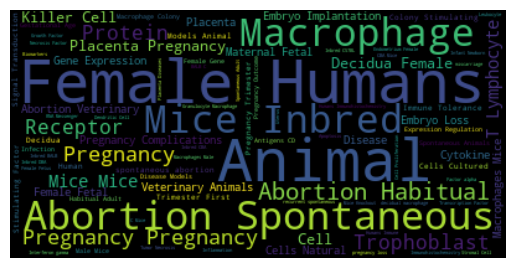

In [53]:
# 创建词云
wordcloud = WordCloud().generate(all_keywords_str)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


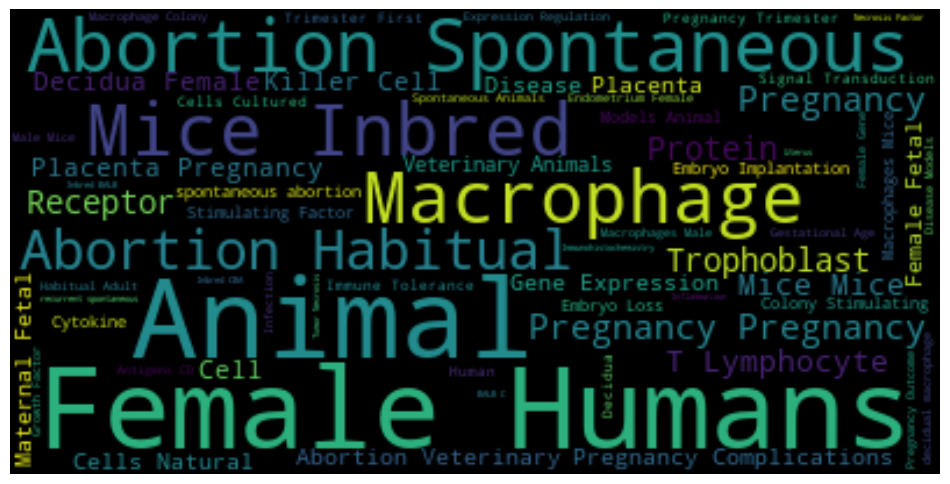

In [58]:
from matplotlib.backends.backend_pdf import PdfPages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 创建一个PDF
pdf_pages = PdfPages('wordcloud.pdf')

# 创建词云
wordcloud = WordCloud().generate(all_keywords_str)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 保存到PDF
pdf_pages.savefig(plt.gcf())

# 关闭PDF
pdf_pages.close()



In [59]:
from collections import Counter
keyword_freq = Counter([word for sublist in articles['keyword_list'] for word in sublist])
keyword_freq

Counter({' Female': 442,
         ' Pregnancy': 414,
         ' Humans': 332,
         ' Macrophages': 201,
         ' Animals': 199,
         ' Mice': 132,
         ' Decidua': 120,
         ' Placenta': 95,
         ' Adult': 81,
         ' Trophoblasts': 80,
         ' Abortion, Habitual': 74,
         ' Cytokines': 72,
         ' Abortion, Spontaneous': 63,
         ' Male': 61,
         'Abortion, Spontaneous': 61,
         ' Killer Cells, Natural': 51,
         'Animals': 51,
         ' Immunohistochemistry': 50,
         ' Endometrium': 43,
         ' Embryo Loss': 41,
         'Abortion, Habitual': 41,
         ' Embryo Implantation': 39,
         ' Uterus': 38,
         ' Signal Transduction': 36,
         ' Fetus': 35,
         ' Pregnancy Trimester, First': 35,
         'Abortion, Veterinary': 35,
         ' Disease Models, Animal': 34,
         ' Cells, Cultured': 34,
         ' Inflammation': 33,
         ' Gestational Age': 32,
         ' Pregnancy Complications': 30,
   

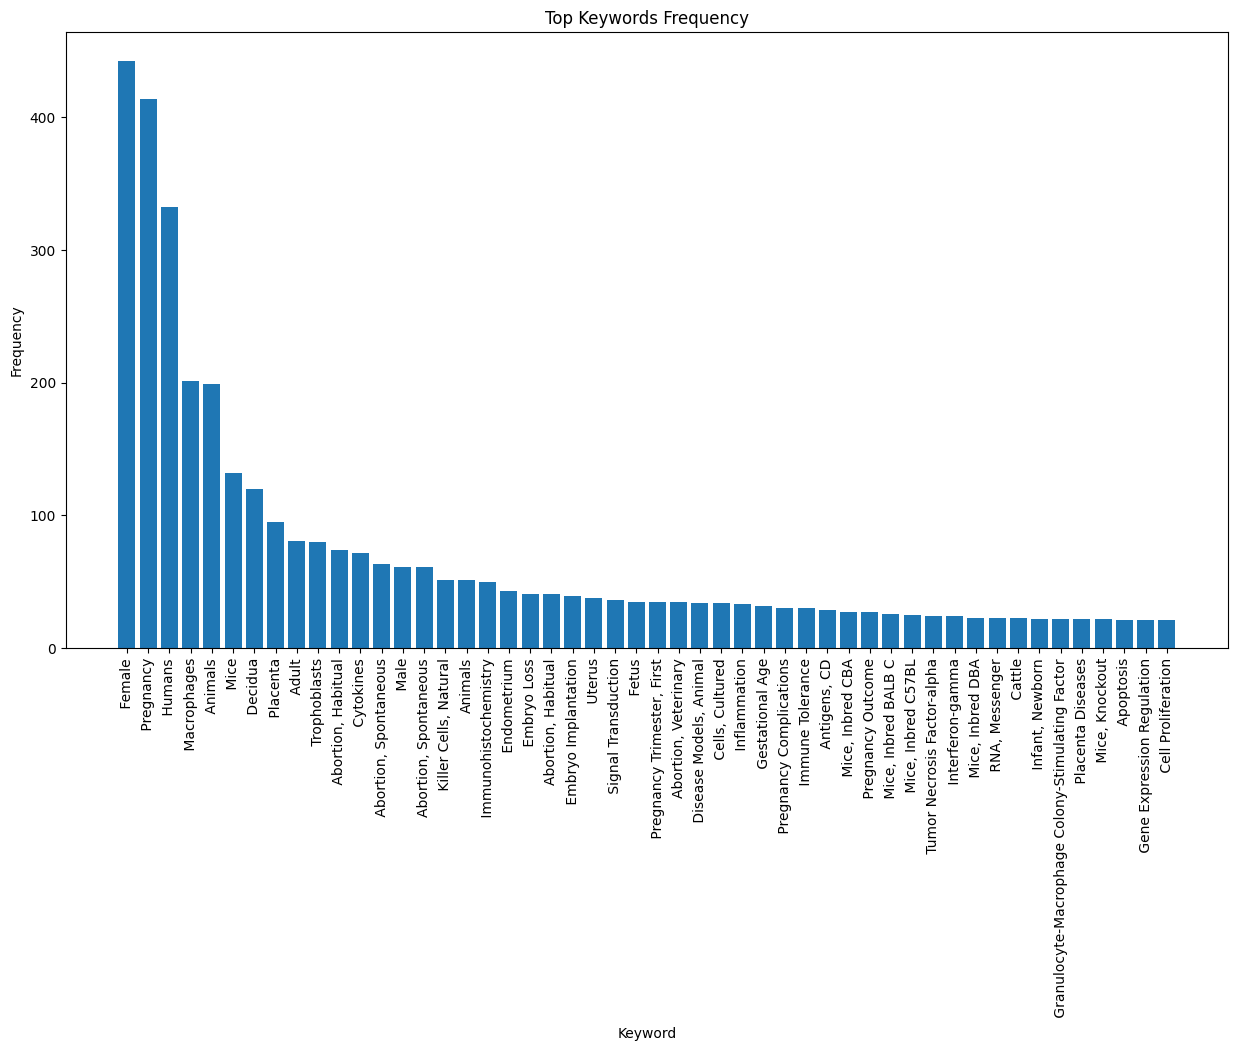

In [74]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 假设 keyword_freq 是一个字典，键是关键词，值是频率
# 获取前10个最频繁的关键词
top_keywords = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True)[:50])
# 创建一个PDF
pdf_pages = PdfPages('frequency.pdf')


# 画图
plt.figure(figsize=(15, 8))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top Keywords Frequency')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=90) # 旋转X轴的标签以减少拥挤
# plt.show()

# 保存到PDF
pdf_pages.savefig(plt.gcf())

# 关闭PDF
pdf_pages.close()




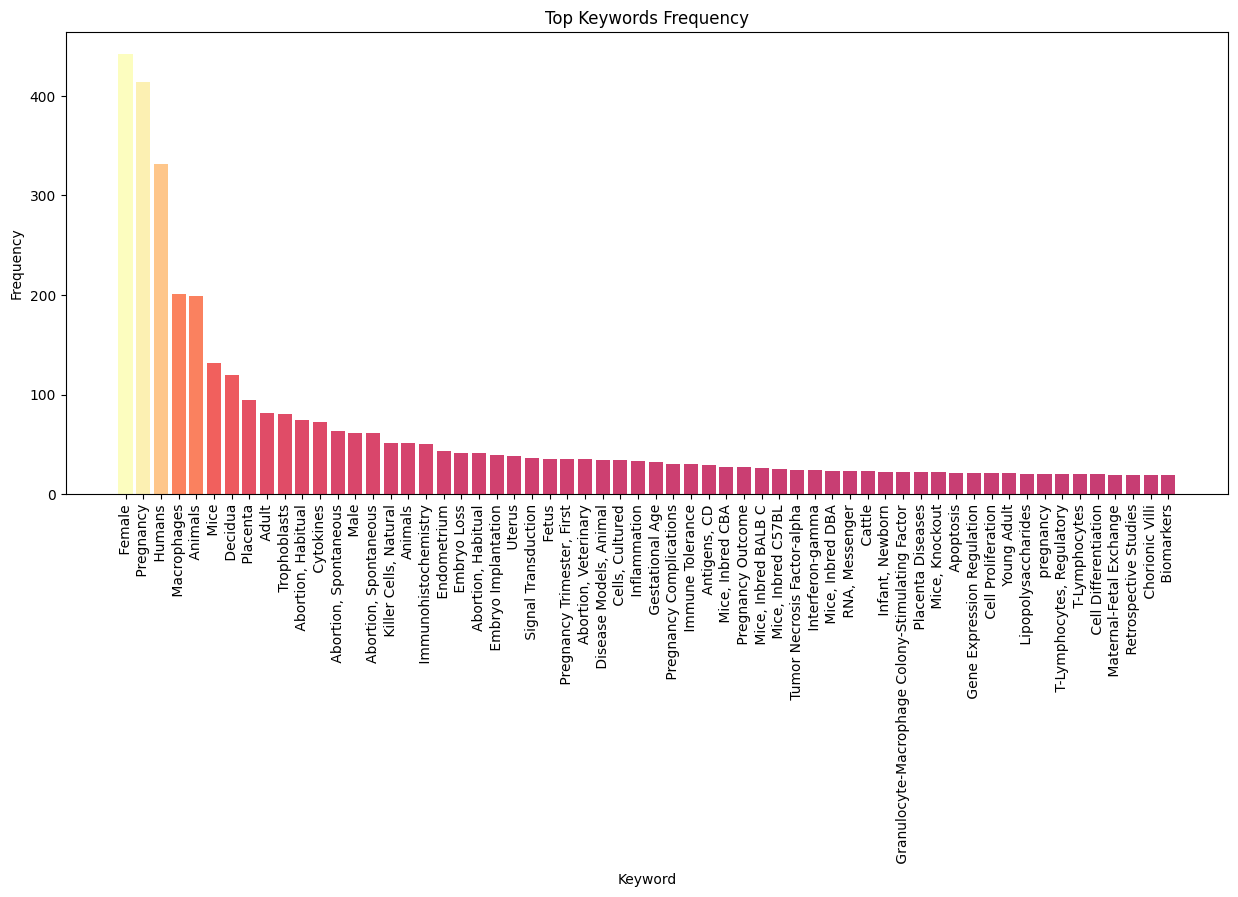

In [88]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages

# 假设 keyword_freq 是一个字典，键是关键词，值是频率
# 获取前10个最频繁的关键词
top_keywords = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True)[:60])

# 创建一个PDF页
pdf_pages = PdfPages('bar_plot_frequency_with_gradient.pdf')

# 用颜色映射创建颜色的列表
norm = mcolors.Normalize(min(top_keywords.values())-500, max(top_keywords.values()))
colors = plt.cm.magma(norm(list(top_keywords.values())))

# 画图
plt.figure(figsize=(15, 6))
plt.bar(top_keywords.keys(), top_keywords.values(), color=colors)
plt.title('Top Keywords Frequency')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # 旋转X轴的标签以减少拥挤

# 保存到PDF
pdf_pages.savefig(plt.gcf())

# 关闭PDF
pdf_pages.close()


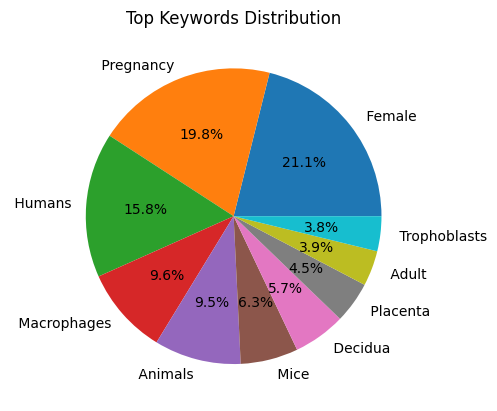

In [78]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 创建一个PDF
pdf_pages = PdfPages('pie_chart_keywords.pdf')

top_keywords = dict(sorted(keyword_freq.items(), key=lambda item: item[1], reverse=True)[:10])
plt.pie(top_keywords.values(), labels=top_keywords.keys(), autopct='%1.1f%%')
plt.title('Top Keywords Distribution')

# 保存到PDF
pdf_pages.savefig(plt.gcf())

# 关闭PDF
pdf_pages.close()



In [16]:
# 将所有的关键词合并到一起成为一个字符串
keywords_str = ' '.join(sum(articles['keyword_list'].tolist(), []))

# 创建词云
wordcloud = WordCloud().generate(keywords_str)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


TypeError: can only concatenate list (not "float") to list